# Upper Confidence Bound (UCB)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [ ]:
import math

N = 1000 # number of rounds or database records
d = 10 # number of adverts
ads_selected = [] # N elements at the end
numbers_of_selectons = [0] * d # Ni(n)
sum_of_rewards = [0] * d # Ri(n)
# [0] * 10 --> initialized as [0,0,0,0,0,0,0,0,0,0]
total_reward = 0

for n in range(0, N):
  ad = 0 # actual advert
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selectons[i] > 0):
      average_reward = sum_of_rewards[i] / numbers_of_selectons[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selectons[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400 # super high value, almost infinity
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selectons[ad] += 1
  reward = dataset.values[n, ad] # from simulation or dataset
  sum_of_rewards[ad] += reward
  total_reward += reward

In [ ]:
print('Numbers of Selectons: ', numbers_of_selectons)
print('Sum of Rewards', sum_of_rewards)
print('Total Reward: ', total_reward)

Numbers of Selectons:  [109, 79, 53, 68, 287, 53, 86, 140, 64, 61]
Sum of Rewards [17, 8, 1, 5, 79, 1, 10, 27, 4, 3]
Total Reward:  155


## Visualising the results

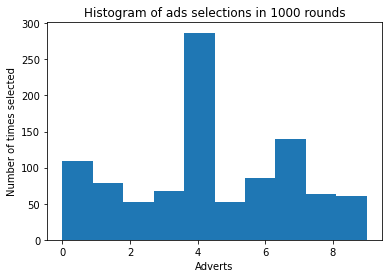

In [ ]:
plt.hist(ads_selected)
title = 'Histogram of ads selections in ' + str(N) + ' rounds'
plt.title(title)
plt.xlabel('Adverts')
plt.ylabel('Number of times selected')
plt.show()